## 프로젝트 1. 경사 하강법으로 이미지 복원하기

### 프로젝트 개요와 목표

이번 프로젝트에서 우리가 풀 문제는 다음과 같습니다.
치명적인 버그가 있는 weird_function() 이라는 함수가 original_image 라고 하는 어느 이미지 파일을 입력받아 broken_image 라는 이미지를 리턴했습니다. 우리는 이 오염된 이미지를 삭제하려고 했으나 실수로 원본 이미지 파일을 삭제해버린 상황입니다.
다행히도 weird_function()의 소스코드는 삭제되지 않았습니다.
우리의 목표는 오염된 이미지와 weird_function()의 코드만을 가지고 원본 이미지 파일을 복원하는 것입니다.

*Sources are based on https://github.com/jcjohnson/pytorch-examples, NYU Intro2ML*

In [1]:
%matplotlib inline
import torch
import pickle
import matplotlib.pyplot as plot

In [2]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

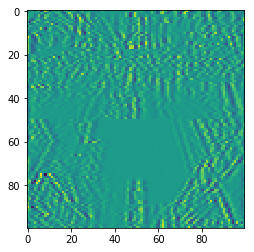

In [3]:
plot.imshow(  broken_image.view(100,100) ) 

In [4]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for ii in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if ii % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [5]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image, 2)

In [6]:
random_tensor = torch.randn(10000, dtype = torch.float)
print(random_tensor)
print(weird_function(random_tensor))

tensor([ 1.0819,  0.4414,  0.8810,  ..., -0.8080,  0.8716,  1.6529])
tensor([ 0.1455,  0.1032, -0.0662,  ...,  0.0145, -0.1423, -0.0802])


In [7]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at ', i, ' = ', loss.item())

Loss at  0  =  12.377154350280762
Loss at  1000  =  1.1459124088287354
Loss at  2000  =  0.5384519100189209
Loss at  3000  =  0.36750683188438416
Loss at  4000  =  0.28883790969848633
Loss at  5000  =  0.2407495230436325
Loss at  6000  =  0.20637495815753937
Loss at  7000  =  0.1792437881231308
Loss at  8000  =  0.15631511807441711
Loss at  9000  =  0.1360049545764923
Loss at  10000  =  0.11742571741342545
Loss at  11000  =  0.10004911571741104
Loss at  12000  =  0.08354274928569794
Loss at  13000  =  0.0676906481385231
Loss at  14000  =  0.052348289638757706
Loss at  15000  =  0.03741894289851189
Loss at  16000  =  0.022839922457933426
Loss at  17000  =  0.021162766963243484
Loss at  18000  =  0.021166853606700897
Loss at  19000  =  0.0211676936596632


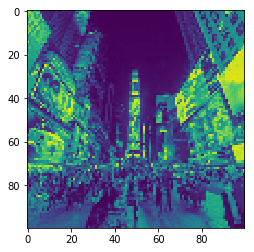

In [8]:
plot.imshow(  random_tensor.view(100,100).data  )

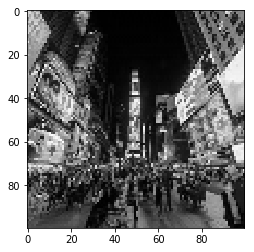

In [9]:
plot.imshow(  random_tensor.view(100,100).data,cmap = 'gray')